# Question 5: RNN - LSTM (1.5 điểm)
- Use AAPL.csv dataset or dowload from link https://finance.yahoo.com/quote/AAPL/history?period1=1479081600&period2=1605312000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
### Requirement:
- Build a model to predict the tomorrow's **Open** value based on the today's **Open** value.
- Build a model to predict the tomorrow's **Open** value based on the today's **Open, High, Low, Close, Adj Close, Volume**

------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# LSTM for air pollution problem with regression framing
import numpy
import matplotlib.pyplot as plt
import math
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [5]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


## **1. Model One To One**
- Build a model to predict the tomorrow's Open value based on the today's Open value.

In [85]:
df = pd.read_csv('data/Dataset/AAPL.csv', index_col = 0)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-14,26.927500,26.952499,26.020000,26.427500,24.825821,204702000
2016-11-15,26.642500,26.920000,26.540001,26.777500,25.154610,129058000
2016-11-16,26.674999,27.557501,26.650000,27.497499,25.830971,235362000
2016-11-17,27.452499,27.587500,27.207500,27.487499,25.821573,110528000
2016-11-18,27.430000,27.635000,27.415001,27.514999,25.847408,113715600
...,...,...,...,...,...,...
2020-11-09,120.500000,121.989998,116.050003,116.320000,116.320000,154515300
2020-11-10,115.550003,117.589996,114.129997,115.970001,115.970001,138023400
2020-11-11,117.190002,119.629997,116.440002,119.489998,119.489998,112295000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 2016-11-14 to 2020-11-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1008 non-null   float64
 1   High       1008 non-null   float64
 2   Low        1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Adj Close  1008 non-null   float64
 5   Volume     1008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.1+ KB


In [87]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,55.022847,55.634645,54.439440,55.068780,53.661965,1.279139e+08
std,22.808228,23.199504,22.329356,22.778370,23.265842,5.914382e+07
min,26.642500,26.920000,26.020000,26.427500,24.825821,2.880380e+07
25%,39.973123,40.278123,39.636251,39.968751,38.069605,8.788140e+07
50%,47.244999,47.631248,46.872500,47.197500,45.769047,1.118354e+08
75%,61.968749,63.971249,61.203751,62.090624,61.046269,1.499102e+08
max,137.589996,137.979996,130.529999,134.179993,133.948898,4.479400e+08


In [88]:
df.index = pd.to_datetime(df.index)

In [89]:
'''
Với One to One, ta chỉ xét column One,
với thời gian của dataset dc thu thập từ 2016-11-14 --> 2020-11-13
'''

'\nVới One to One, ta chỉ xét column One,\nvới thời gian của dataset dc thu thập từ 2016-11-14 --> 2020-11-13\n'

In [90]:
df1 = df[['Open']]
df1

,Open
Date,
2016-11-14,26.927500
2016-11-15,26.642500
2016-11-16,26.674999
2016-11-17,27.452499
2016-11-18,27.430000
...,...
2020-11-09,120.500000
2020-11-10,115.550003
2020-11-11,117.190002


In [91]:
df1.Open.dtype

dtype('float64')

In [92]:
df1.describe()

,Open
count,1008.000000
mean,55.022847
std,22.808228
min,26.642500
25%,39.973123
50%,47.244999
75%,61.968749
max,137.589996


In [93]:
df1.isnull().sum()

Open    0
dtype: int64

In [94]:
'''
ko có null nè
'''

'\nko có null nè\n'

#### ***Data Nomalization***

In [95]:
scaler = MinMaxScaler(feature_range=(0,1))
df1_new = scaler.fit_transform(df1)

#### ***Split Data***

In [96]:
df1_new.shape

(1008, 1)

In [97]:
1008*0.7

705.5999999999999

In [98]:
train_size = 706 

train, test = df1_new[0:train_size, :], df1_new[train_size:, :]

In [111]:
# convert an array of values into a dataset matrix
# # look_back là số ngày nó nhìn lại
# vd: look_back = 1 nghĩa là hôm nay nhìn lại từ hqua, hqua nhìn lại từ hôm kia, ...
def create_dataset(dataset, look_back=1): 
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
	#t
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
	#t+1
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [174]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [175]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### ***Build Model***

#### ***Model 1***

In [176]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [179]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(128, input_shape=(1, look_back)))
model.add(Dense(1))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 128)               66560     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [180]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta = 0.0001, patience = 20, restore_best_weights = True)

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, validation_data=(testX, testY), 
                    epochs=100, 
                    batch_size=32,
                    verbose=1,
                    callbacks = [early_stopping])

Epoch 1/100
22/22 [==============================] - 3s 28ms/step - loss: 0.0129 - val_loss: 0.1548
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.1006
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.1067
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0913
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0790
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0656
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0527
Epoch 8/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0407
Epoch 9/100
22/22 [==============================] - 0s 6ms/step - loss: 9.4660e-04 - val_loss: 0.0271
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 6.7917e-04 - val_loss: 0.0170


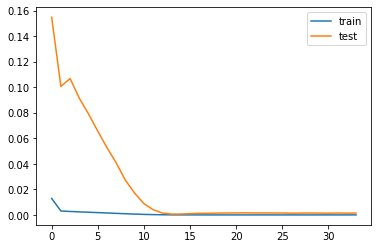

In [181]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

loss của train và test đều rất nhỏ, ko xảy ra hiện tượng overfitting

In [182]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [183]:
# calculate root mean squared error
train_rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f RMSE' % (train_rmse))
test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f RMSE' % (test_rmse))

Train RMSE: 0.90 RMSE
Test RMSE: 2.85 RMSE


In [184]:
df1.describe()

,Open
count,1008.000000
mean,55.022847
std,22.808228
min,26.642500
25%,39.973123
50%,47.244999
75%,61.968749
max,137.589996


RMSE của cả train và test đều nhỏ => model có thể sử dụng

In [186]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df1_new)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1_new)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df1_new)-1, :] = testPredict


In [ ]:
%matplotlib inline

# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title="Notes")
plt.show()


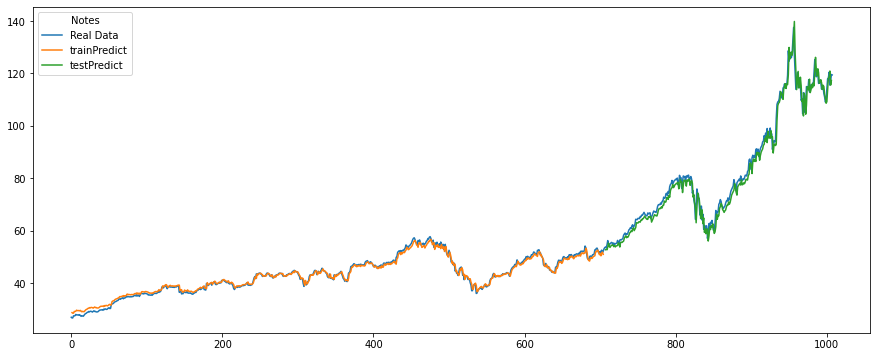

In [187]:
%matplotlib inline

# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1_new), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title="Notes")
plt.show()


- Từ biểu đồ, ta thấy model 1 cho ra kết quả tốt, phần giá trị dự đoán khá khớp với thực tế.
- Tuy nhiên, ta thử mở rộng về độ rộng và độ sâu của LSTM để xem thử kết quả có tốt hơn hay ko

#### ***Model 2***
- ta thử mở rộng LSTM sâu và rộng hơn

In [205]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [206]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [207]:
trainX.shape

(704, 1, 1)

In [208]:
# create and fit the LSTM network
model1 = Sequential()
model1.add(LSTM(units = 128, return_sequences = True, input_shape = (1, look_back)))
model1.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 128, return_sequences = True))
model1.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 128, return_sequences = True))
model1.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 128))
model1.add(Dropout(0.2))

# Adding the output layer
model1.add(Dense(units = 1))

model1.compile(loss='mean_squared_error', optimizer='adam')

model1.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 1, 128)            66560     
                                                                 
 dropout_38 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_49 (LSTM)              (None, 1, 128)            131584    
                                                                 
 dropout_39 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_50 (LSTM)              (None, 1, 128)            131584    
                                                                 
 dropout_40 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_51 (LSTM)              (None, 128)             

In [209]:
from keras.callbacks import EarlyStopping

In [210]:
early_stopping = EarlyStopping(min_delta = 0.0001, patience = 20, restore_best_weights = True)

In [211]:
history = model1.fit(trainX, trainY, validation_data=(testX, testY), 
                    epochs=200, 
                    batch_size=128,
                    verbose=1,
                    callbacks = [early_stopping])

Epoch 1/200
6/6 [==============================] - 9s 355ms/step - loss: 0.0225 - val_loss: 0.2675
Epoch 2/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0141 - val_loss: 0.2247
Epoch 3/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0065 - val_loss: 0.1654
Epoch 4/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0047 - val_loss: 0.1319
Epoch 5/200
6/6 [==============================] - 0s 29ms/step - loss: 0.0048 - val_loss: 0.1561
Epoch 6/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0040 - val_loss: 0.1733
Epoch 7/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0041 - val_loss: 0.1724
Epoch 8/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0040 - val_loss: 0.1624
Epoch 9/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0039 - val_loss: 0.1500
Epoch 10/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0038 - val_loss: 0.1458
Epoch 11/200
6/6 [

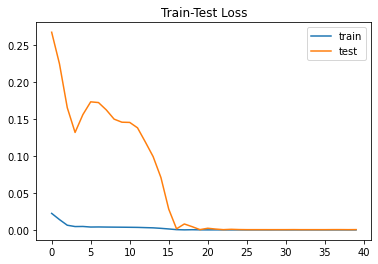

In [212]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Train-Test Loss')
plt.legend()
plt.show()

- loss của cả train và test đều rất thấp, ko xảy ra hiện tượng overfitting

In [213]:
# make predictions
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)

In [214]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [215]:
trainY[0][:5]

array([26.6425  , 26.674999, 27.452499, 27.43    , 27.530001])

In [216]:
trainPredict[:5]

array([[28.347607],
       [28.088778],
       [28.11828 ],
       [28.825054],
       [28.804573]], dtype=float32)

In [217]:
# calculate root mean squared error
train_rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f RMSE' % (train_rmse))
test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f RMSE' % (test_rmse))


Train RMSE: 0.82 RMSE
Test RMSE: 2.54 RMSE


In [152]:
df1.describe()

,Open
count,1008.000000
mean,55.022847
std,22.808228
min,26.642500
25%,39.973123
50%,47.244999
75%,61.968749
max,137.589996


- RMSE của train và test đều nhỏ, thậm chí còn nhỏ hơn so với model 1

In [218]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df1_new)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1_new)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df1_new)-1, :] = testPredict


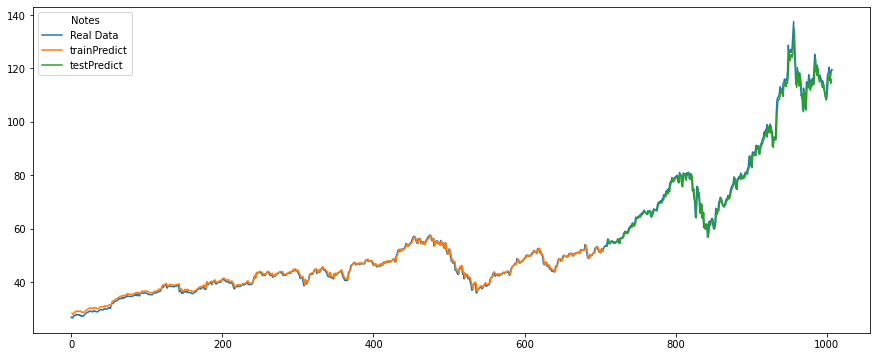

In [219]:
%matplotlib inline

# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1_new), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title="Notes")
plt.show()



Dù chỉ sử dụng 1 Input nhưng LSTM đưa ra kết quả tốt. 
 
**Đối với model 1 (kiến trúc LSTM đơn giản):** 
- Train RMSE model 1: 0.90 RMSE
- Test RMSE model 1: 2.85 RMSE 
    - kết quả tốt, phần dự đoán khá khớp với thực tế (chỉ lệch khá nhỏ)

**Đối với model 2 (LSTM được mở rộng sâu và rộng hơn):**
- Train RMSE: 0.82 RMSE
- Test RMSE: 2.54 RMSE 
    - kết quả đưa ra tố hơn model 1, phần dự đoán khớp với thực tế



### **Save model**
- vì model 2 cho kết quả tốt hơn nên ta sẽ chọn model 2

In [220]:
# tên biến là model1 nhưng lại là model 2 ạ:))
model1.save('LDS8_K275_DinhVietTrung_Cuoi_ky/model/one_to_one_LSTM.h5')


### **Dự đoán vài giá trị**

In [223]:
x_new = scaler.transform([[100]])
x_new = numpy.reshape(x_new, (1, 1, 1))
y_new = model1.predict(x_new)
y_new = scaler.inverse_transform(y_new)
y_new

array([[99.36258]], dtype=float32)